# Computer Vision: Assignment 3 Part 1 - Some CNN Basics [40%]

Spring 2021 semester.

Due date: **July 19th 2021.**

## Introduction

This question is an introduction to using PyTorch for training simple neural net models. 

Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

Perform this assignment in PyTorch, modifying the baseline code, producing outputs and adding required explanations - *all within this ipython notebook*.

Finally, submit this iPython notebook, including outputs, as an .ipynb file (exact submission guidelines will be given in the next couple of days). 

## Question (1): Warmup [5%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

**a)**  Use `matplotlib` and ipython notebook's visualization capabilities to display one train and one test image of each class, for each of the two datasets.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

** Relevant Cell: "Data Loading" **

## Question (2): Training a Single Layer Network on MNIST [10%]

Start by running the training on MNIST. By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 60,000 MNIST training images for 10 epochs (passes through the training data). 

The loss function [cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

**a)** Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

**b)** Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Question (3): Training a Multi-Layer Network on MNIST [10%]

**a)**  Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class] and train the model for 10 epochs.

**b)**   Now set the learning rate to 10 and retrain. Give a brief explanation to the observed results.

## Question (4): Training a Convolutional Network on CIFAR [15%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

**a)** Train it for 20 epochs on the CIFAR-10 training set and Visualize the first layer filters.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist)

**b)**  Give a breakdown of the number of parameters within the above model, as well as the overall number.

# ***Example Code***

In [1]:
# imports
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
from matplotlib import pyplot as plt
from torch.autograd import Variable
import numpy as np

In [2]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

In [3]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the datasets from the internet
if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)

elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.model = torch.nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs)  # reshape input to batch x num_inputs
        output = self.model(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [5]:
# train and test functions
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test():
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [6]:
# Training
for i in range(1, epochs+1):
  train(i)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.350400
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.471353
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.471745
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.524324
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.506115
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.438874
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.351566
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.479929
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.539240
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.460862
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.453634
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.255662
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.248780
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.314491
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.385310
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.305817
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.221916
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.246284
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.346755
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.283681
Train Epoch:

In [7]:
# Testing
test()





Test set: Average loss: 0.2739, Accuracy: 9218/10000 (92%)



# **Answer (1):**



Files already downloaded and verified
Files already downloaded and verified


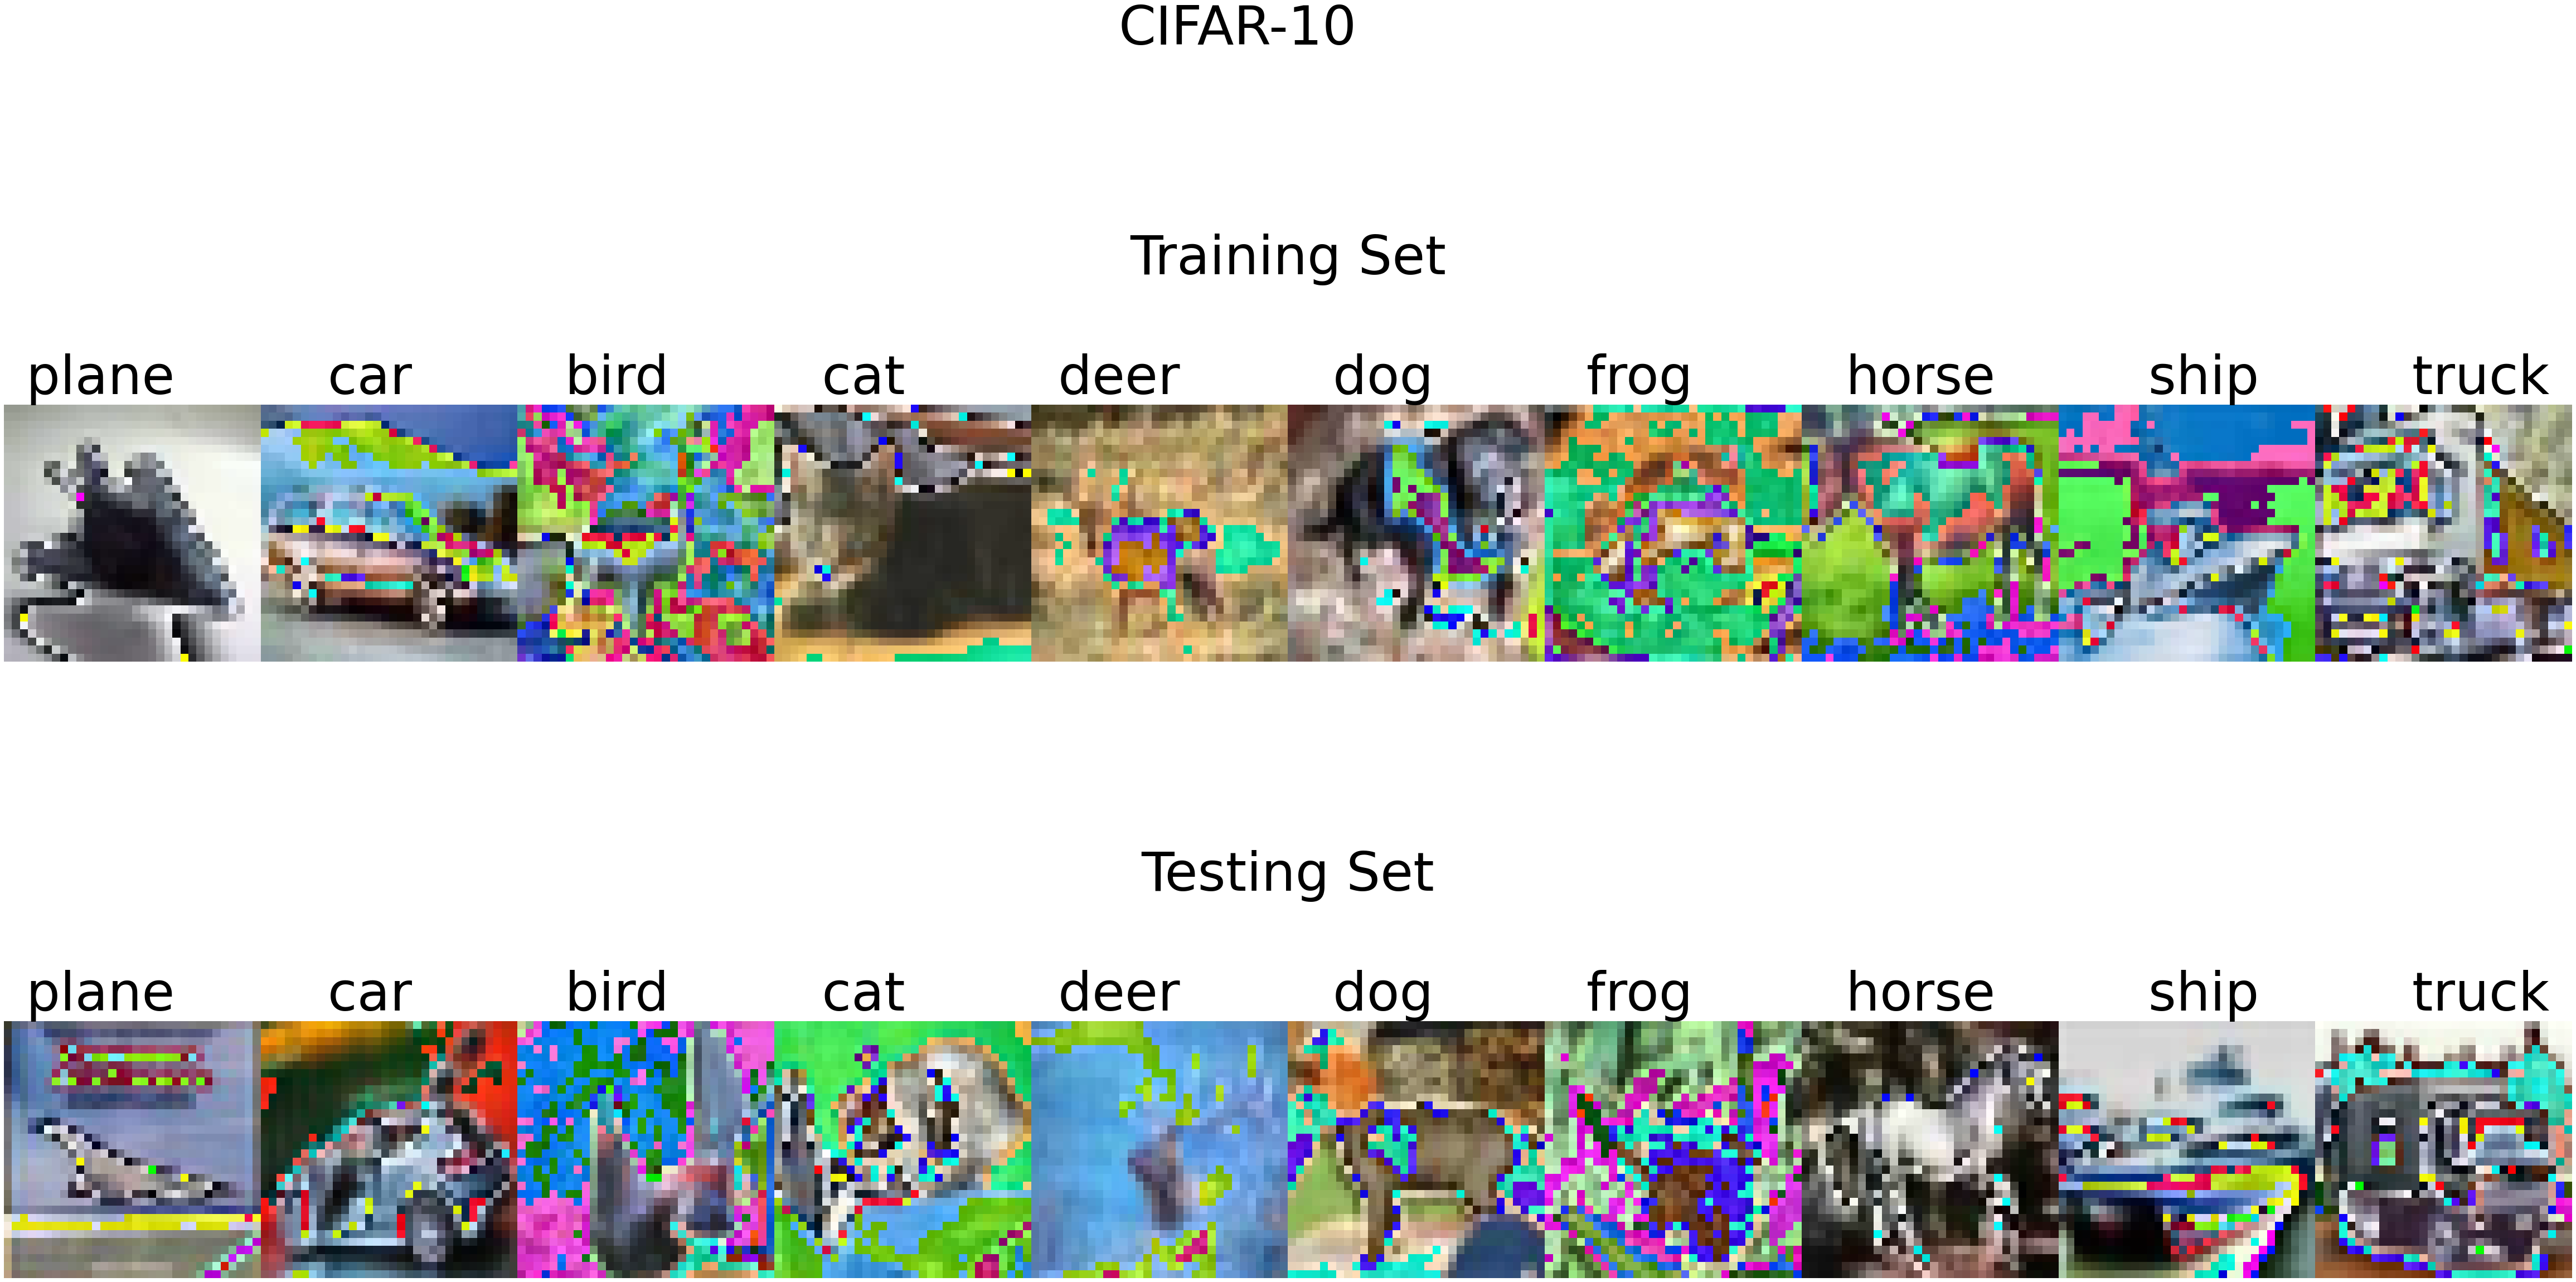

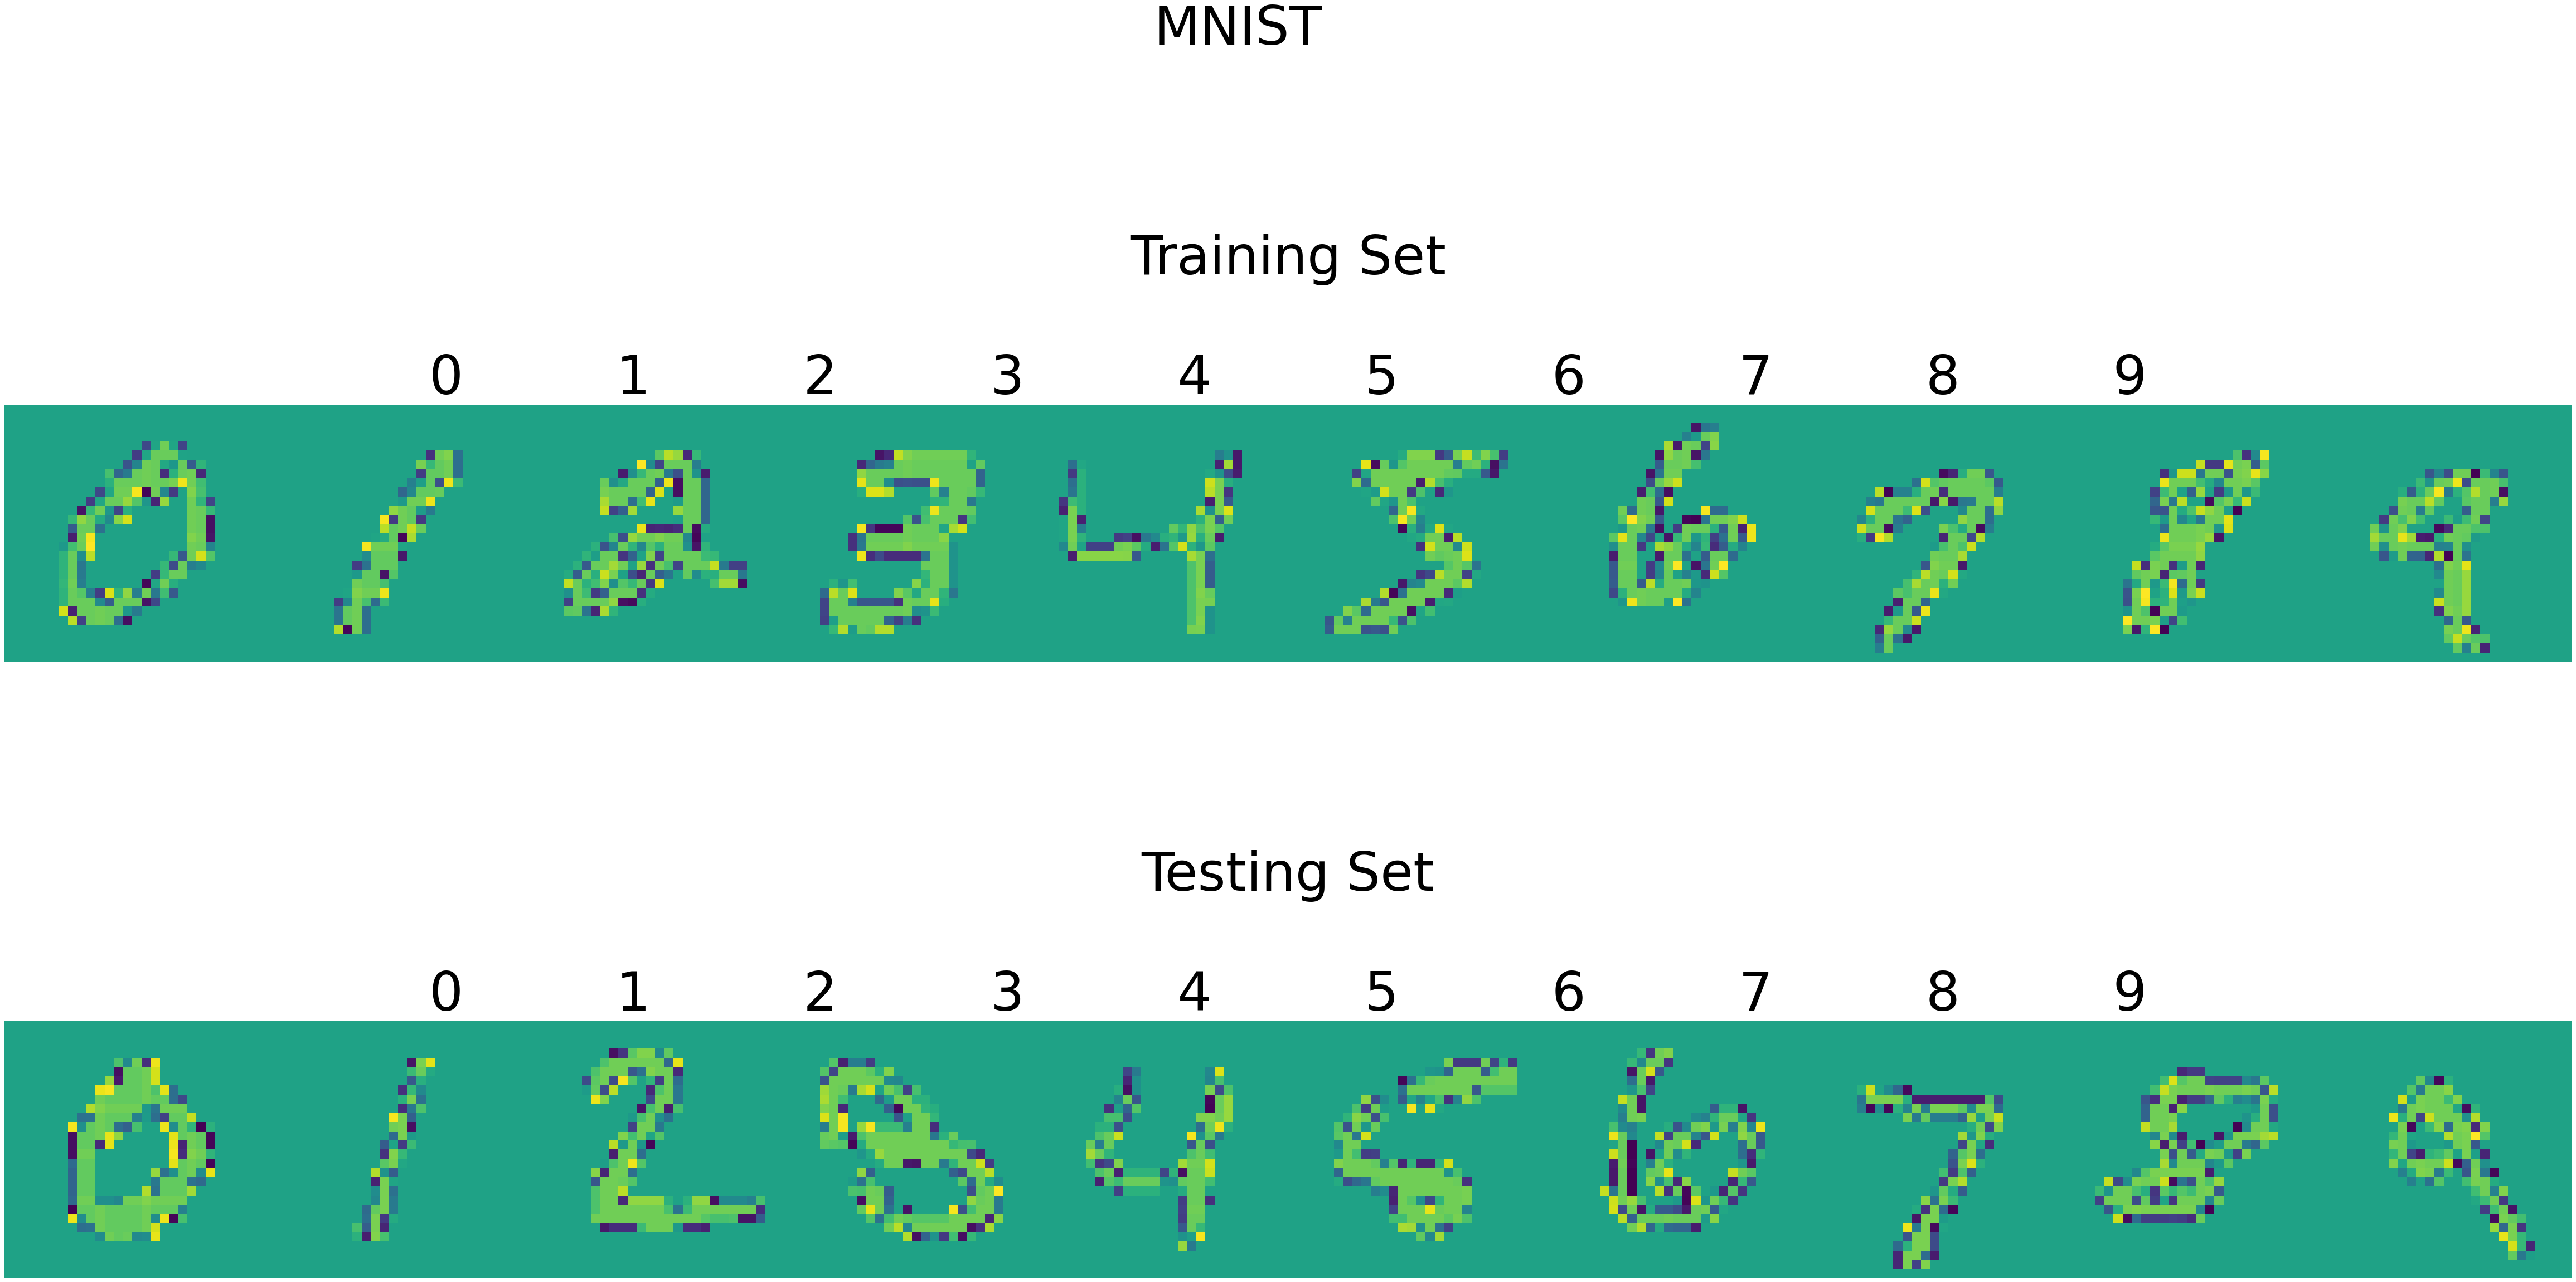

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

def show_classes(cifar_train, cifar_test, classes, datasetName):
    fig = plt.figure(figsize=(100, 100))
    examples = {i: [] for i in range(len(classes))}
    plt.rcParams.update({'font.size': 80})
    # Adds a subplot at the 1st position
    fig.add_subplot(10, 1, 1)
    n_examples = 1
    for x, i in cifar_train:
        if all([len(ex) == n_examples for ex in examples.values()]):
            break
        if len(examples[i]) < n_examples:
            examples[i].append(x)

    transforms.ToPILImage()(examples[3][0])
    grid = torch.cat([torch.cat(examples[i], dim=1) for i in range(len(classes))], dim=2)
    results = transforms.ToPILImage()(grid)
    # showing image
    plt.imshow(results)
    plt.axis('off')
    plt.title("Training Set\n\n" + '         '.join(classes))
    plt.suptitle(datasetName)

    # Adds a subplot at the 2nd position
    fig.add_subplot(10, 1, 3)

    examples_2 = {i: [] for i in range(len(classes))}

    for x, i in cifar_test:
        if all([len(ex) == n_examples for ex in examples_2.values()]):
            break
        if len(examples_2[i]) < n_examples:
            examples_2[i].append(x)

    transforms.ToPILImage()(examples_2[3][0])
    grid = torch.cat([torch.cat(examples_2[i], dim=1) for i in range(len(classes))], dim=2)
    results = transforms.ToPILImage()(grid)
    # showing image
    plt.imshow(results)
    plt.axis('off')
    plt.title("Testing Set\n\n" + '         '.join(classes))


if __name__ == '__main__':
    CIFAR10_transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    CIFAR10trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                   download=True, transform=CIFAR10_transform)
    CIFAR10testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                                  download=True, transform=CIFAR10_transform)
    CIFAR10classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    show_classes(CIFAR10trainset, CIFAR10testset, CIFAR10classes, "CIFAR-10")

    MNIST_transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])

    MNISTtrainset = torchvision.datasets.MNIST(root='./data', train=True,
                                                   download=True, transform=MNIST_transform)
    MNISTtestset = torchvision.datasets.MNIST(root='./data', train=False,
                                                  download=True, transform=MNIST_transform)
    MNISTclasses = ('0', '1', '2', '3',
               '4', '5', '6', '7', '8', '9')
    
    show_classes(MNISTtrainset, MNISTtestset, MNISTclasses, "MNIST")

# **Answer (2):**

# **Explaination:**

As we expected, the accuracy of the model has decreased as the net didn't iterate over all the data at each epoch. 

The average loss has increased because of the same reason - more accurate data has been skipped so high loss data has become more dominant on the average.

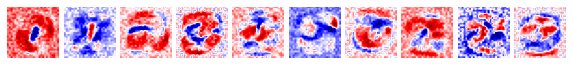

In [ ]:
def plot_weights(tensor):
    tensor = tensor.reshape(10, 28, 28)
    num_rows = 1 + tensor.shape[0] // 10
    fig = plt.figure(figsize=(10, num_rows))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows, 10, i + 1)
        ax1.imshow(tensor[i], cmap = 'seismic')
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
weights = network.model.weight.detach().numpy()
plot_weights(weights)

In [ ]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        break
            
train_loader = torch.utils.data.DataLoader(trainset, batch_size=50, shuffle=False, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=50, shuffle=False, num_workers=0)

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)
epochs = 100
# Training
for i in range(1, epochs+1):
  train(i)

test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.600169
Train Epoch: 2 [0/60000 (0%)]	Loss: 2.354090
Train Epoch: 3 [0/60000 (0%)]	Loss: 2.141186
Train Epoch: 4 [0/60000 (0%)]	Loss: 1.955709
Train Epoch: 5 [0/60000 (0%)]	Loss: 1.793296
Train Epoch: 6 [0/60000 (0%)]	Loss: 1.650468
Train Epoch: 7 [0/60000 (0%)]	Loss: 1.524419
Train Epoch: 8 [0/60000 (0%)]	Loss: 1.412847
Train Epoch: 9 [0/60000 (0%)]	Loss: 1.313799
Train Epoch: 10 [0/60000 (0%)]	Loss: 1.225580
Train Epoch: 11 [0/60000 (0%)]	Loss: 1.146719
Train Epoch: 12 [0/60000 (0%)]	Loss: 1.075944
Train Epoch: 13 [0/60000 (0%)]	Loss: 1.012172
Train Epoch: 14 [0/60000 (0%)]	Loss: 0.954483
Train Epoch: 15 [0/60000 (0%)]	Loss: 0.902100
Train Epoch: 16 [0/60000 (0%)]	Loss: 0.854365
Train Epoch: 17 [0/60000 (0%)]	Loss: 0.810722
Train Epoch: 18 [0/60000 (0%)]	Loss: 0.770694
Train Epoch: 19 [0/60000 (0%)]	Loss: 0.733877
Train Epoch: 20 [0/60000 (0%)]	Loss: 0.699922
Train Epoch: 21 [0/60000 (0%)]	Loss: 0.668527
Train Epoch: 22 [0/60000 (0%)]	Loss: 0.6394

# **Answer (3):**

# **Explaination:**

As we can see in a's results, adding one extra layer with 1000 hidden units has improved the accuracy of the model by 3%, but naturally the train at each epoch has been slowed.

After increasing the Learning Rate from 0.01 to 10, the accuracy dropped dramatically and the loss increased significantly - but the local minimum has been achieved faster. It's an expected outcome as a low balanced L.R. gives better results and extremely high L.R. such as 10 gives poor results because we might skipped the local desired minimum. The SGD process finds the gradient of the loss function, and goes on the opposite way to the local minimum of the loss function. The learning rate represents the step size of the learning process over the loss function towards the local minimum. In case of LR = 10 means that the step size is way too high, which means that the model misses the local minimum in large scale - and that causes decrease in the accuracy compared to the case where LR = 0.01 ; It achieved lower value of local minimum due to small step sizes. 

In [8]:
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(num_inputs, 1000),
            torch.nn.Tanh(),
            nn.Linear(1000, num_outputs)
        )

    def forward(self, input):
        input = input.view(-1, num_inputs)  # reshape input to batch x num_inputs
        output = self.model(input)
        return output

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

for i in range(1, epochs+1):
  train(i)

test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.310165
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.684461
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.609733
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.548182
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.268677
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.458991
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.503770
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.254857
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.325139
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.368475
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.383198
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.366597
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.275390
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.237090
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.324896
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.372231
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.469471
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.368367
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.302800
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.282148
Train Epoch:

In [9]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=10)

for i in range(1, epochs+1):
  train(i)

test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.315590
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1432.432861
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1086.330322
Train Epoch: 1 [19200/60000 (32%)]	Loss: 498.511047
Train Epoch: 1 [25600/60000 (43%)]	Loss: 679.143555
Train Epoch: 1 [32000/60000 (53%)]	Loss: 934.331055
Train Epoch: 1 [38400/60000 (64%)]	Loss: 307.534088
Train Epoch: 1 [44800/60000 (75%)]	Loss: 370.669464
Train Epoch: 1 [51200/60000 (85%)]	Loss: 607.591064
Train Epoch: 1 [57600/60000 (96%)]	Loss: 347.877899
Train Epoch: 2 [0/60000 (0%)]	Loss: 179.112595
Train Epoch: 2 [6400/60000 (11%)]	Loss: 207.484436
Train Epoch: 2 [12800/60000 (21%)]	Loss: 431.320343
Train Epoch: 2 [19200/60000 (32%)]	Loss: 410.686218
Train Epoch: 2 [25600/60000 (43%)]	Loss: 154.727661
Train Epoch: 2 [32000/60000 (53%)]	Loss: 286.598846
Train Epoch: 2 [38400/60000 (64%)]	Loss: 584.842041
Train Epoch: 2 [44800/60000 (75%)]	Loss: 150.173965
Train Epoch: 2 [51200/60000 (85%)]	Loss: 146.804230
Train Epoch: 2 [57600/60

# **Answer (4):**
a) Code and results are provided below

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 [0/50000 (0%)]	Loss: 2.313240
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.154430
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.011145
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.951045
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.028161
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.825923
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.836646
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.815618
Train Epoch: 2 [0/50000 (0%)]	Loss: 1.898960
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.732197
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.836656
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.575762
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.729385
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.626799
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.810501
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.714583
Train Epoch: 3 [0/50000 (0%)]	Loss: 1.744220
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.525037
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1

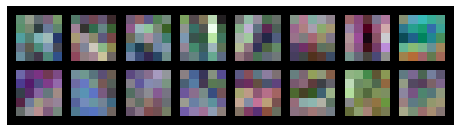

Overall number of parameters 258058
For ('conv1', Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))) the number of parameters 1216
For ('conv2', Conv2d(16, 128, kernel_size=(5, 5), stride=(1, 1))) the number of parameters 51328
For ('fc1', Linear(in_features=3200, out_features=64, bias=True)) the number of parameters 204864
For ('fc2', Linear(in_features=64, out_features=10, bias=True)) the number of parameters 650


In [ ]:
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=(5, 5))
        self.conv2 = nn.Conv2d(16, 128, kernel_size=(5, 5))
        self.fc1 = nn.Linear(num_inputs + 128, 64)
        self.fc2 = nn.Linear(64, num_outputs)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.tanh(x)
        x = torch.max_pool2d(x, 2)
        x = self.conv2(x)
        x = torch.tanh(x)
        x = torch.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = torch.tanh(x)
        x = self.fc2(x)
        output = x
        return output

# for cifar10 dataset        
num_inputs = 3072
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)
network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

for i in range(1, 21):
  train(i)

test()

def visualize_first_layer(tensor):
    rows = np.min((tensor.shape[0] // 8 + 1, 64))
    grid = utils.make_grid(tensor, nrow=8, normalize=True, padding=1)
    plt.figure(figsize=(8, rows))
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

filters = network.conv1.weight.detach().clone()
visualize_first_layer(filters)
plt.axis('off')
plt.ioff()
plt.show()

for name, model in zip(network.named_modules(), network.modules()):
    total_params = sum(p.numel() for p in model.parameters())
    if str(name[1]).startswith("Net"):
        print("Overall number of parameters {}".format(total_params))
    else:
        print("For {} the number of parameters {}".format(name, total_params))

'''
Overall number of parameters 258058
For ('conv1', Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))) the number of parameters 1216
For ('conv2', Conv2d(16, 128, kernel_size=(5, 5), stride=(1, 1))) the number of parameters 51328
For ('fc1', Linear(in_features=3200, out_features=64, bias=True)) the number of parameters 204864
For ('fc2', Linear(in_features=64, out_features=10, bias=True)) the number of parameters 650

VISUALIZATION OF THE FIRST LAYER FILTERS IS IN THE END OF THE OUTPUT BELOW
'''
